In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt


In [2]:
covid = pd.read_csv(r'C:\Users\Surface\4. covid_19_data.csv')
covid

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


Data cleaning

In [3]:
covid.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [4]:
covid.shape

(321, 6)

In [5]:
covid.size

1926

In [6]:
# find out the null cases
covid.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<AxesSubplot:>

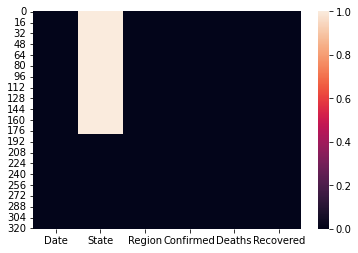

In [7]:
# show null values in a plot
sns.heatmap(covid.isnull())

In [8]:
# drop nan values
df = covid.dropna(subset=['State'])


In [9]:
# verified
df.isnull().sum()


Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [11]:
# all deferent States
df['State'].unique()

array(['Alabama', 'Alaska', 'Alberta', 'Anguilla', 'Anhui', 'Arizona',
       'Arkansas', 'Aruba', 'Australian Capital Territory', 'Beijing',
       'Bermuda', 'Bonaire, Sint Eustatius and Saba', 'British Columbia',
       'British Virgin Islands', 'California', 'Cayman Islands',
       'Channel Islands', 'Chongqing', 'Colorado', 'Connecticut',
       'Curacao', 'Delaware', 'Diamond Princess cruise ship',
       'District of Columbia', 'Falkland Islands (Malvinas)',
       'Faroe Islands', 'Florida', 'French Guiana', 'French Polynesia',
       'Fujian', 'Gansu', 'Georgia', 'Gibraltar', 'Grand Princess',
       'Greenland', 'Guadeloupe', 'Guam', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hawaii', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Idaho', 'Illinois', 'Indiana',
       'Inner Mongolia', 'Iowa', 'Isle of Man', 'Jiangsu', 'Jiangxi',
       'Jilin', 'Kansas', 'Kentucky', 'Liaoning', 'Louisiana', 'Macau',
       'Maine', 'Manitoba', 'Martinique

In [9]:
# number of states
len(df['State'].unique())

137

In [10]:
# deferent regions
df['Region'].unique()

array(['US', 'Canada', 'UK', 'Mainland China', 'Netherlands', 'Australia',
       'Denmark', 'France', 'Hong Kong', 'Macau'], dtype=object)

In [11]:
# number of deferent regions
len(df['Region'].unique())

10

In [12]:
# sum of confirmed , deaths , recovered cases by state
data = df.groupby(df['Region'])['Confirmed','Deaths','Recovered'].sum().head(20)
data

C:\Users\Surface\AppData\Local\Temp\ipykernel_14096\1658517563.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(df['Region'])['Confirmed','Deaths','Recovered'].sum().head(20)


,Confirmed,Deaths,Recovered
Region,,,
Australia,6752,91,5715
Canada,52865,3155,20327
Denmark,198,0,192
France,1450,34,890
Hong Kong,1037,4,830
Macau,45,0,34
Mainland China,82862,4633,77610
Netherlands,196,16,119
UK,1220,69,857


In [13]:
# remove recored where confirmed class less than 10
df[~(df.Confirmed < 10)]

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
183,4/29/2020,Alberta,Canada,5165,87,0
185,4/29/2020,Anhui,Mainland China,991,6,985
186,4/29/2020,Arizona,US,7209,308,0
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [14]:
# Region that have max confirmed cases 
df.groupby(df['Region']).Confirmed.sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

In [15]:
# Region that have the min Deaths cases 
df.groupby(df['Region']).Deaths.sum().sort_values(ascending = True).head(1)

Region
Denmark    0
Name: Deaths, dtype: int64

In [16]:
# Region that have max Recovered cases 
df.groupby(df['Region']).Recovered.sum().sort_values(ascending = False).head(1)

Region
US    120720
Name: Recovered, dtype: int64

In [17]:
# deaths and confirmed cases in india  (TRUE)
covid.groupby(covid.Region == 'India')['Deaths','Confirmed'].sum()

C:\Users\Surface\AppData\Local\Temp\ipykernel_14096\340724092.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid.groupby(covid.Region == 'India')['Deaths','Confirmed'].sum()


,Deaths,Confirmed
Region,,
False,226559,3160824
True,1079,33062


In [18]:

# sort data by confirmed ascending

df.sort_values(by='Confirmed', ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
284,4/29/2020,Recovered,Canada,0,0,20327
285,4/29/2020,Recovered,US,0,0,120720
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
232,4/29/2020,Illinois,US,50358,2215,0
249,4/29/2020,Massachusetts,US,60265,3405,0
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
262,4/29/2020,New Jersey,US,116365,6771,0


In [19]:

# sort data by Recovered descending

df.sort_values(by='Recovered', ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
284,4/29/2020,Recovered,Canada,0,0,20327
264,4/29/2020,New South Wales,Australia,3016,40,2284
220,4/29/2020,Guangdong,Mainland China,1588,8,1557
...,...,...,...,...,...,...
248,4/29/2020,Maryland,US,20849,1078,0
246,4/29/2020,Manitoba,Canada,275,6,0
245,4/29/2020,Maine,US,1056,52,0
243,4/29/2020,Louisiana,US,27660,1845,0


In [11]:
df.to_excel('COVID19.xlsx')